<a href="https://colab.research.google.com/github/akhilesh008/AIML-Training-Akhilesh/blob/main/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing some pytorch packages
import torch
from torch.nn import Conv2d

In [2]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


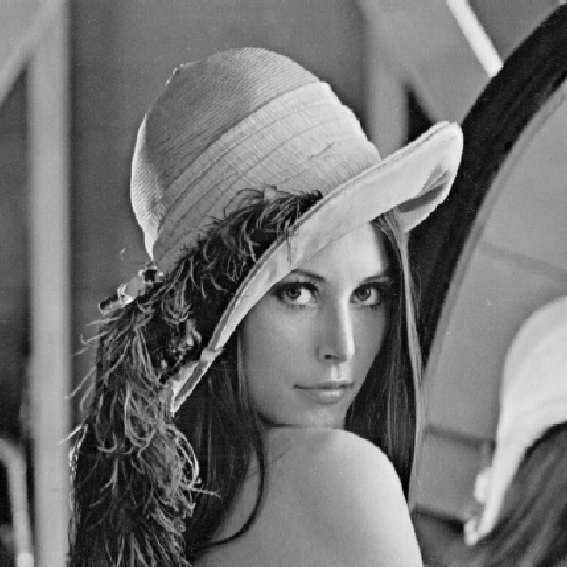

In [5]:
from google.colab.patches import cv2_imshow
# Our original image
image = cv2.imread('/content/drive/MyDrive/Lena.jpg', 0)
cv2_imshow(image)

In [6]:
# average gilter
av_filter = np.array([[1,1,1],
                   [ 1, 1, 1],
                   [ 1, 1, 1]])
av_filter = 1/9 * av_filter

out1 = apply_conv(image, av_filter, padding=0, stride=1)

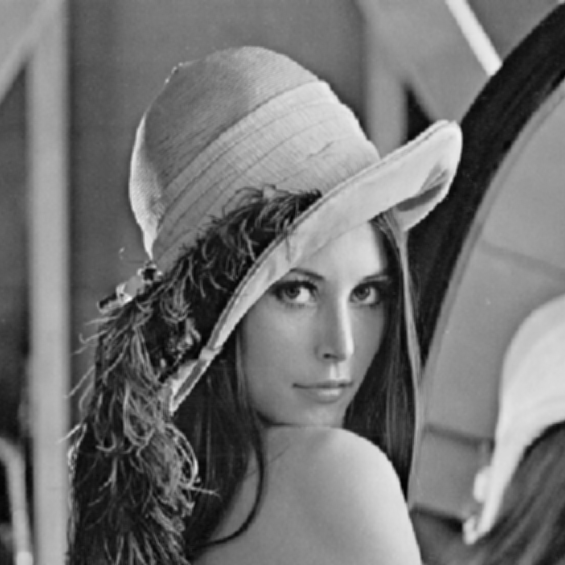

In [7]:
cv2_imshow(out1)

In [10]:
# sharpening gilter
shp_filter = np.array([[-1,-1,-1],
                   [ -1, 9, -1],
                   [ -1, -1, -1]])
#shp_filter = 1/9 * shp_filter
out_shp = apply_conv(image, shp_filter, padding=0, stride=1)

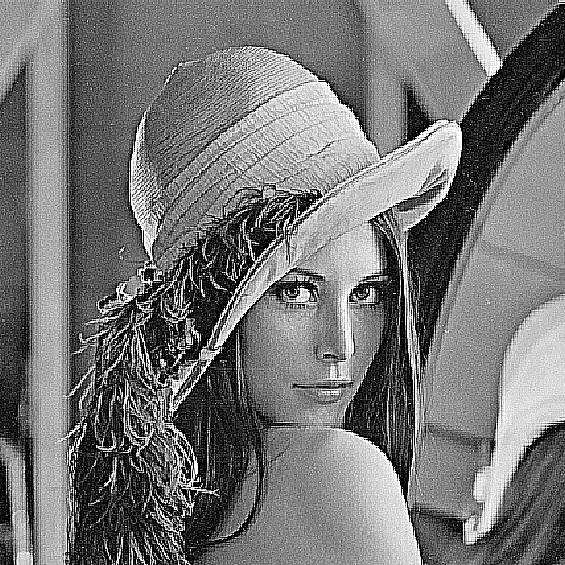

In [11]:
cv2_imshow(out_shp)

In [16]:
# diagonal edge filter
diag_filter = np.array([[0,1,2],
                   [ -1, 0, 1],
                   [ -2, -1, 0]])

out_diag = apply_conv(image, diag_filter, padding=1, stride=1)
out_diag = image+out_diag

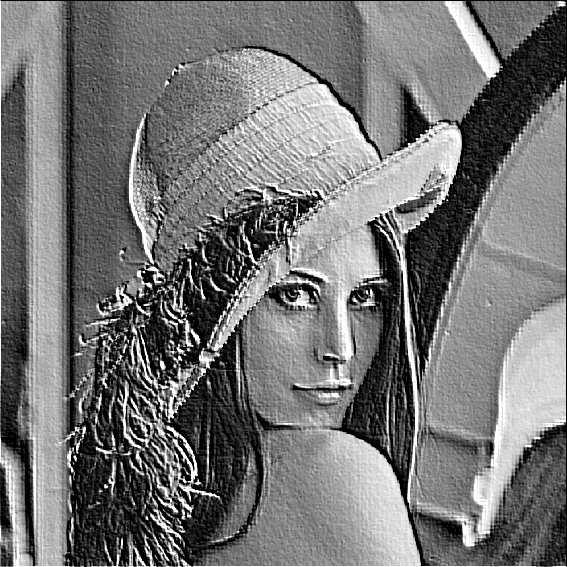

In [17]:
cv2_imshow(out_diag)